In [3]:
from google.colab import files
import pandas as pd
import numpy as np
import nltk
import string
import re
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import create_optimizer
import os
import tensorflow as tf
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("Please select the 4 csv fashion data using the Upload button")
uploaded = files.upload()

Please select the 4 csv fashion data using the Upload button


Saving 4. Gap.csv to 4. Gap.csv
Saving 3. Uniqlo_UK.csv to 3. Uniqlo_UK.csv
Saving 2. HM.csv to 2. HM.csv
Saving 1. Zara.csv to 1. Zara.csv


In [4]:
print(os.listdir())

['.config', '4. Gap.csv', '1. Zara.csv', '2. HM.csv', '3. Uniqlo_UK.csv', 'sample_data']


In [5]:
# datasets for each company
df_zara = pd.read_csv("1. Zara.csv")
df_hm = pd.read_csv("2. HM.csv")
df_mango = pd.read_csv("4. Gap.csv")
df_uniqlo = pd.read_csv("3. Uniqlo_UK.csv")

# Add the Company column to each dataset
df_zara['Company'] = 'Zara'
df_hm['Company'] = 'H&M'
df_mango['Company'] = 'Gap'
df_uniqlo['Company'] = 'Uniqlo'

# Combine all the data into a single DataFrame
df_combined = pd.concat([df_zara, df_hm, df_mango, df_uniqlo], ignore_index=True)

In [6]:
#first 5 rows
df_combined.head(5)

,Used_Hashtag(s),Tweet_Content,Post_Length,Likes_Count,Tweet_DateTime,Replies_Count,Retweets_Count,Image(s),video(s),GIF(s),HaveText,Tweet_URL,Reply_Content,Reply_URL,Company
0,NaN,A sheer tulle dress that fits with metallic pa...,97,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,True,https://twitter.com/ZARA/status/16965836350408...,@ZARA When Iraq delivery open ? 😍,https://twitter.com/marzab7s/status/1698040260...,Zara
1,NaN,A sheer tulle dress that fits with metallic pa...,97,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,True,https://twitter.com/ZARA/status/16965836350408...,@ZARA Zara para iademi yap artik! 25 agustosta...,https://twitter.com/sensizim_yinee/status/1697...,Zara
2,NaN,A sheer tulle dress that fits with metallic pa...,97,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,True,https://twitter.com/ZARA/status/16965836350408...,@ZARA @anabellelozam @ZARA_Care تواصلت مع خدمة...,https://twitter.com/C745Ut/status/169790109867...,Zara
3,NaN,A sheer tulle dress that fits with metallic pa...,97,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,True,https://twitter.com/ZARA/status/16965836350408...,"@ZARA @ZARA devolví artículos el 7 de agosto,m...",https://twitter.com/AnitadeMadriZ/status/16975...,Zara
4,NaN,A sheer tulle dress that fits with metallic pa...,97,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,True,https://twitter.com/ZARA/status/16965836350408...,@ZARA love this leather coat!,https://twitter.com/semir_intl/status/16974500...,Zara


In [7]:
#last 5 rows
df_combined.tail(5)

,Used_Hashtag(s),Tweet_Content,Post_Length,Likes_Count,Tweet_DateTime,Replies_Count,Retweets_Count,Image(s),video(s),GIF(s),HaveText,Tweet_URL,Reply_Content,Reply_URL,Company
4631,NaN,Everyone's favourite @Nintendo characters are ...,129,14,2017-05-18 08:33:52+00:00,2,20,1,0,0,True,https://twitter.com/UNIQLO_UK/status/865123258...,"@aparaitre @Nintendo Hi, for exact measurement...",https://twitter.com/UNIQLO_UK/status/865199048...,Uniqlo
4632,NaN,Everyone's favourite @Nintendo characters are ...,129,14,2017-05-18 08:33:52+00:00,2,20,1,0,0,True,https://twitter.com/UNIQLO_UK/status/865123258...,@UNIQLO_UK @Nintendo Is there a big difference...,https://twitter.com/aparaitre/status/865157039...,Uniqlo
4633,NaN,Everyone's favourite @Nintendo characters are ...,129,14,2017-05-18 08:33:52+00:00,2,20,1,0,0,True,https://twitter.com/UNIQLO_UK/status/865123258...,@UNIQLO_UK @Nintendo Why can't we buy the Kirb...,https://twitter.com/Grizzlykreiden/status/8651...,Uniqlo
4634,NaN,We're celebrating the launch of our @Nintendo ...,160,6,2017-05-17 16:30:53+00:00,1,4,1,0,0,True,https://twitter.com/UNIQLO_UK/status/864880913...,@UNIQLO_UK @Nintendo Can't wait to buy some te...,https://twitter.com/PixelBitKitty/status/86545...,Uniqlo
4635,NaN,Come draw with Jason Polan on Thurs 25th at 31...,163,3,2017-05-17 10:30:27+00:00,1,0,1,0,0,True,https://twitter.com/UNIQLO_UK/status/864790207...,"@UNIQLO_UK Hi, Are Jason Polan's kids t shirt ...",https://twitter.com/KristySLuxford/status/8651...,Uniqlo


In [8]:
df = df_combined

# Convert Tweet DateTime to pandas datetime format
df['Tweet_DateTime'] = pd.to_datetime(df['Tweet_DateTime'], errors='coerce')

# Clean Tweet_Content and Reply_Content (text preprocessing)
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)  # Removes any URL starting with 'http'
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Apply text preprocessing for both Tweet_Content and Reply_Content
df['Tweet_Content'] = df['Tweet_Content'].apply(preprocess_text)
df['Reply_Content'] = df['Reply_Content'].apply(preprocess_text)

# Tokenization
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

df['Tweet_Tokens'] = df['Tweet_Content'].apply(nltk.word_tokenize)
df['Reply_Tokens'] = df['Reply_Content'].apply(nltk.word_tokenize)

# Feature Engineering
# Convert categorical 'Company' into numeric format using LabelEncoder
label_encoder = LabelEncoder()
df['Company_Encoded'] = label_encoder.fit_transform(df['Company'])

# Generate additional features for machine learning
df['Post_Length'] = df['Tweet_Content'].apply(len)
df['Reply_Length'] = df['Reply_Content'].apply(len)
df['Image_Count'] = df['Image(s)']
df['Video_Count'] = df['video(s)']
df['GIF_Count'] = df['GIF(s)']
df['HaveText'] = df['HaveText'].apply(lambda x: 1 if x == 'TRUE' else 0)
df['Tweet_Content'] = df['Tweet_Content'].apply(preprocess_text)
df['Reply_Content'] = df['Reply_Content'].apply(preprocess_text)

# Combine tweet and reply content for sentiment analysis
df['Reply_Text'] = df['Reply_Content']


stop_words = set(stopwords.words('english'))
df['Reply_Text'] = df['Reply_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df['Reply_Text'] = df.Reply_Text.apply(lemmatize_text)
df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Used_Hashtag(s),Tweet_Content,Post_Length,Likes_Count,Tweet_DateTime,Replies_Count,Retweets_Count,Image(s),video(s),GIF(s),...,Reply_URL,Company,Tweet_Tokens,Reply_Tokens,Company_Encoded,Reply_Length,Image_Count,Video_Count,GIF_Count,Reply_Text
0,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,https://twitter.com/marzab7s/status/1698040260...,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, when, iraq, delivery, open, 😍]",3,31,1,0,0,zara iraq delivery open 😍
1,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,https://twitter.com/sensizim_yinee/status/1697...,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, zara, para, iademi, yap, artik, 25, agu...",3,129,1,0,0,zara zara para iademi yap artik 25 agustostan ...
2,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,https://twitter.com/C745Ut/status/169790109867...,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, anabellelozam, zaracare, تواصلت, مع, خد...",3,101,1,0,0,zara anabellelozam zaracare تواصلت مع خدمة الع...
3,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,https://twitter.com/AnitadeMadriZ/status/16975...,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, zara, devolví, artículos, el, 7, de, ag...",3,259,1,0,0,zara zara devolví artículos el 7 de agostome c...
4,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,https://twitter.com/semir_intl/status/16974500...,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, love, this, leather, coat]",3,27,1,0,0,zara love leather coat


In [9]:
# Drop any irrelevant columns or duplicate columns
df.drop(columns=['Tweet_URL', 'Reply_URL'], inplace=True)

In [10]:
df.head(5)

,Used_Hashtag(s),Tweet_Content,Post_Length,Likes_Count,Tweet_DateTime,Replies_Count,Retweets_Count,Image(s),video(s),GIF(s),...,Reply_Content,Company,Tweet_Tokens,Reply_Tokens,Company_Encoded,Reply_Length,Image_Count,Video_Count,GIF_Count,Reply_Text
0,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,zara when iraq delivery open 😍,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, when, iraq, delivery, open, 😍]",3,31,1,0,0,zara iraq delivery open 😍
1,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,zara zara para iademi yap artik 25 agustostan ...,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, zara, para, iademi, yap, artik, 25, agu...",3,129,1,0,0,zara zara para iademi yap artik 25 agustostan ...
2,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,zara anabellelozam zaracare تواصلت مع خدمة الع...,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, anabellelozam, zaracare, تواصلت, مع, خد...",3,101,1,0,0,zara anabellelozam zaracare تواصلت مع خدمة الع...
3,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,zara zara devolví artículos el 7 de agostome c...,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, zara, devolví, artículos, el, 7, de, ag...",3,259,1,0,0,zara zara devolví artículos el 7 de agostome c...
4,NaN,a sheer tulle dress that fits with metallic pa...,51,66,2023-08-29 18:00:34+00:00,8,5,1,0,0,...,zara love this leather coat,Zara,"[a, sheer, tulle, dress, that, fits, with, met...","[zara, love, this, leather, coat]",3,27,1,0,0,zara love leather coat


In [11]:
# EDA
df.columns

Index(['Used_Hashtag(s)', 'Tweet_Content', 'Post_Length', 'Likes_Count',
       'Tweet_DateTime', 'Replies_Count', 'Retweets_Count', 'Image(s)',
       'video(s)', 'GIF(s)', 'HaveText', 'Reply_Content', 'Company',
       'Tweet_Tokens', 'Reply_Tokens', 'Company_Encoded', 'Reply_Length',
       'Image_Count', 'Video_Count', 'GIF_Count', 'Reply_Text'],
      dtype='object')

In [12]:
data= df

# Inspect the dataset
print(data.info())
print(data.describe(include="all"))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4636 entries, 0 to 4635
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Used_Hashtag(s)  1095 non-null   object             
 1   Tweet_Content    4636 non-null   object             
 2   Post_Length      4636 non-null   int64              
 3   Likes_Count      4636 non-null   int64              
 4   Tweet_DateTime   4636 non-null   datetime64[ns, UTC]
 5   Replies_Count    4636 non-null   int64              
 6   Retweets_Count   4636 non-null   int64              
 7   Image(s)         4636 non-null   int64              
 8   video(s)         4636 non-null   int64              
 9   GIF(s)           4636 non-null   int64              
 10  HaveText         4636 non-null   int64              
 11  Reply_Content    4636 non-null   object             
 12  Company          4636 non-null   object             
 13  Tweet_Tokens     4

In [13]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
data['Reply_Content'].fillna("No Reply", inplace=True)
data.dropna(subset=['Tweet_Content'], inplace=True)


Used_Hashtag(s)    3541
Tweet_Content         0
Post_Length           0
Likes_Count           0
Tweet_DateTime        0
Replies_Count         0
Retweets_Count        0
Image(s)              0
video(s)              0
GIF(s)                0
HaveText              0
Reply_Content         0
Company               0
Tweet_Tokens          0
Reply_Tokens          0
Company_Encoded       0
Reply_Length          0
Image_Count           0
Video_Count           0
GIF_Count             0
Reply_Text            0
dtype: int64


<ipython-input-13-23faadd4a7e2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Reply_Content'].fillna("No Reply", inplace=True)


In [14]:
# Numerical summary
print(data[['Post_Length', 'Likes_Count', 'Replies_Count', 'Retweets_Count']].describe())

# Count unique hashtags
print(f"Unique hashtags used: {data['Used_Hashtag(s)'].nunique()}")


       Post_Length  Likes_Count  Replies_Count  Retweets_Count
count  4636.000000  4636.000000    4636.000000     4636.000000
mean    115.557161   106.268335      92.432485       22.807377
std      84.527085   160.456166      82.142660       61.194671
min       0.000000     1.000000       0.000000        0.000000
25%      39.750000    39.000000      23.000000        6.000000
50%     105.000000    77.000000      67.000000       18.000000
75%     208.000000   153.000000     148.000000       32.000000
max     276.000000  5145.000000     280.000000     2318.000000
Unique hashtags used: 43


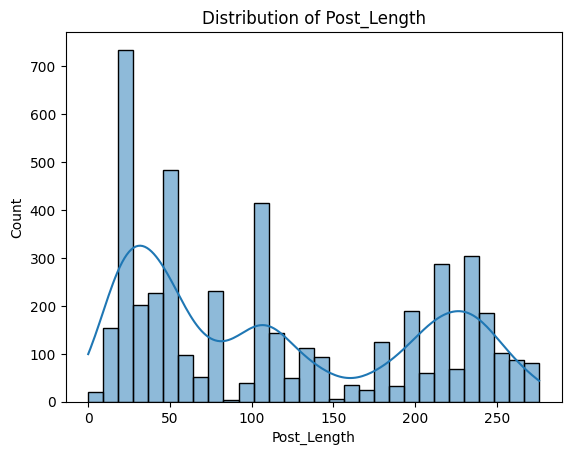

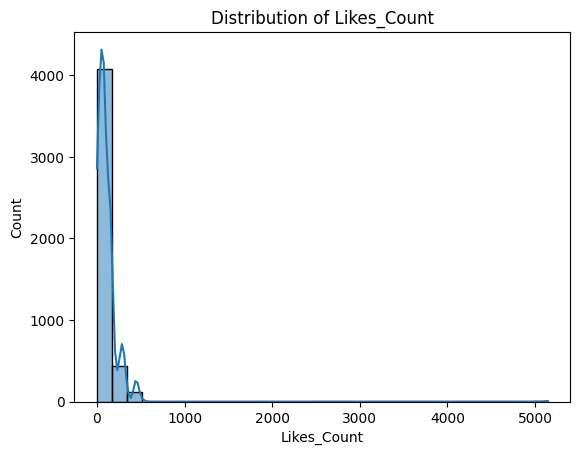

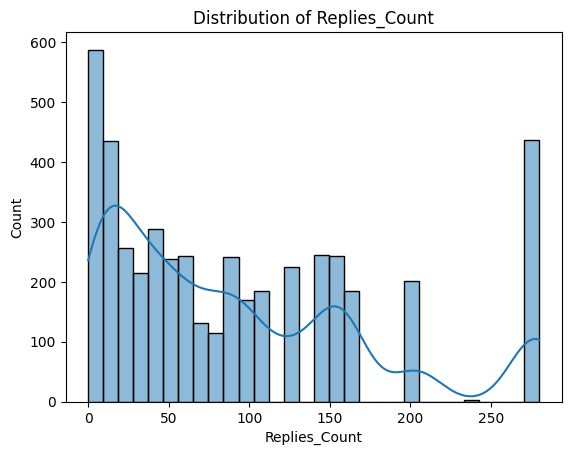

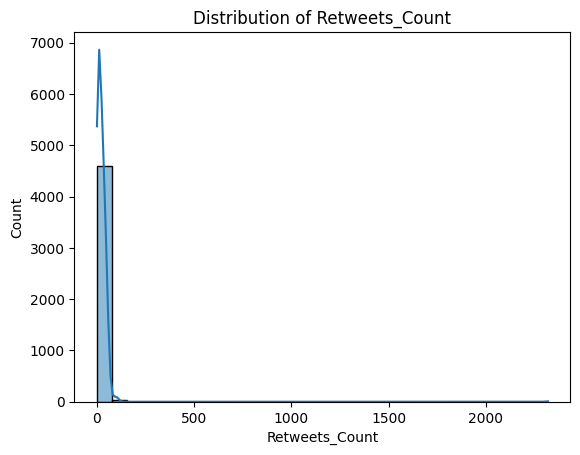

In [15]:
# Distribution plots for numerical features
for col in ['Post_Length', 'Likes_Count', 'Replies_Count', 'Retweets_Count']:
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


<ipython-input-17-2c55b7a9afa0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company', data=data, palette='Set2')


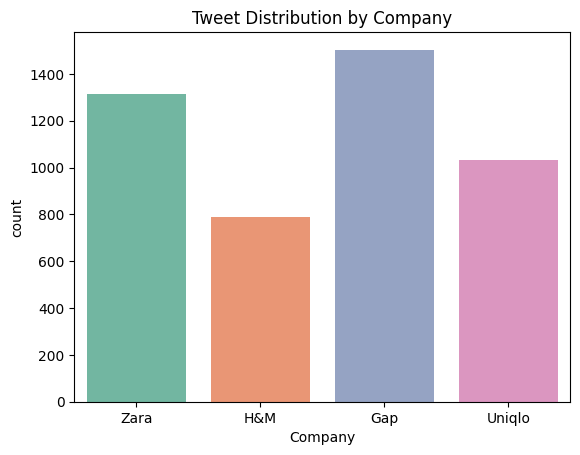

<ipython-input-17-2c55b7a9afa0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HaveText', data=data, palette='Set1')


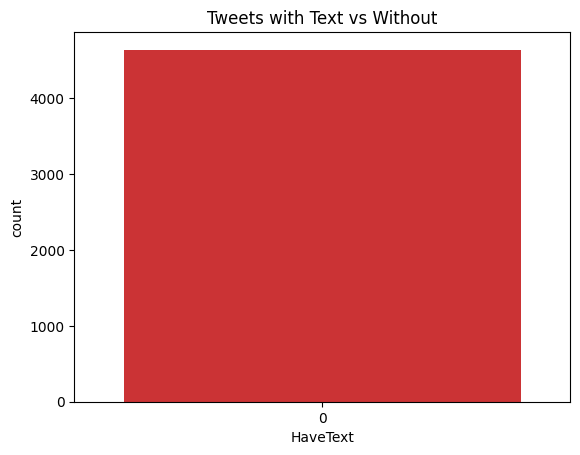

In [17]:
# Count plot for Company
sns.countplot(x='Company', data=data, palette='Set2')
plt.title("Tweet Distribution by Company")
plt.show();

# Count plot for `HaveText`
sns.countplot(x='HaveText', data=data, palette='Set1')
plt.title("Tweets with Text vs Without")
plt.show();


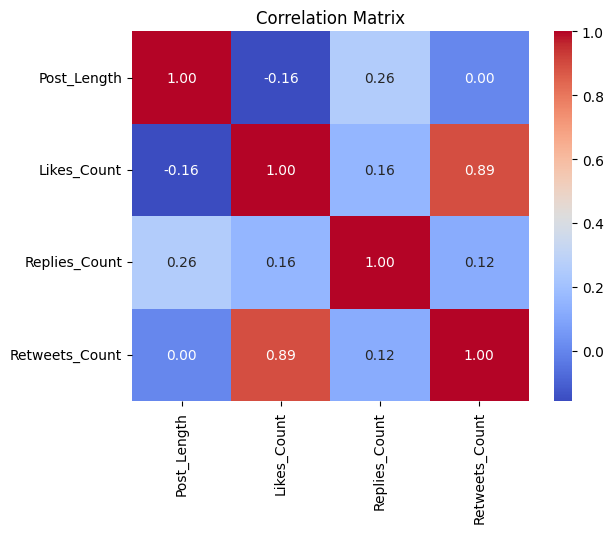

In [16]:
# Correlation matrix
correlation = data[['Post_Length', 'Likes_Count', 'Replies_Count', 'Retweets_Count']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


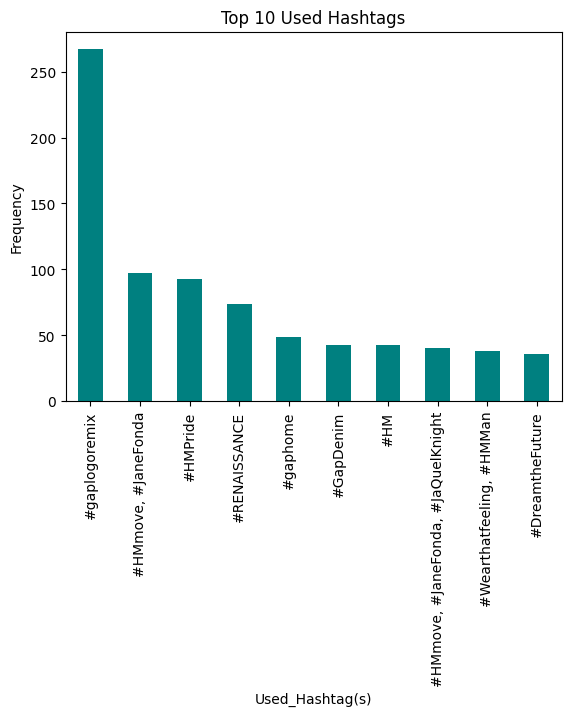

In [18]:
# Behavioral Insights
# Hashtags and Customer Engagement:
hashtag_counts = data['Used_Hashtag(s)'].value_counts().head(10)
hashtag_counts.plot(kind='bar', color='teal')
plt.title("Top 10 Used Hashtags")
plt.ylabel("Frequency")
plt.show()


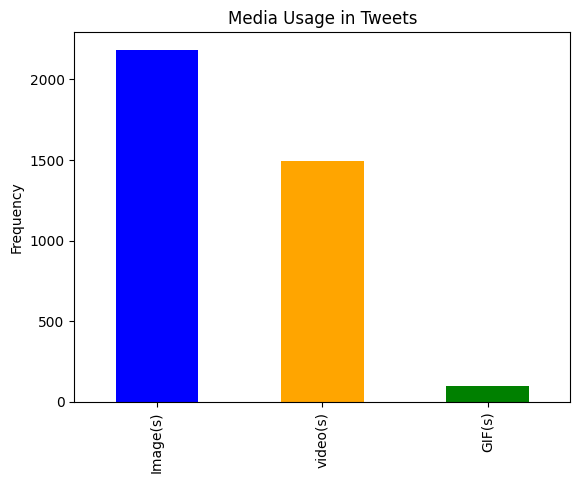

In [19]:
# Media type distribution
media_counts = data[['Image(s)', 'video(s)', 'GIF(s)']].sum()
media_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Media Usage in Tweets")
plt.ylabel("Frequency")
plt.show()


In [20]:
# Engagement grouped by media type
media_engagement = data.groupby(['Image(s)', 'video(s)', 'GIF(s)'])[['Likes_Count', 'Replies_Count', 'Retweets_Count']].mean()
print(media_engagement)


                          Likes_Count  Replies_Count  Retweets_Count
Image(s) video(s) GIF(s)                                            
0        0        0         90.543230      83.668026       13.665579
                  1        162.375000     141.843750       27.656250
         1        0        109.072435     105.483568       34.040912
1        0        0        103.687840      84.366606       17.607381
2        0        0          5.923077       3.846154        1.076923
3        0        0        248.983871     124.016129       49.338710
4        0        0         33.090909       4.878788       10.121212


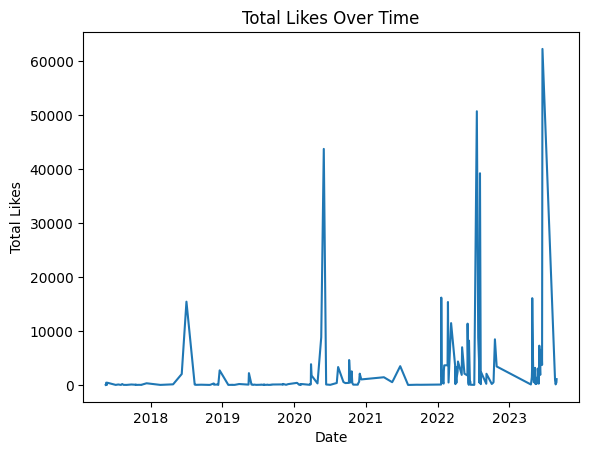

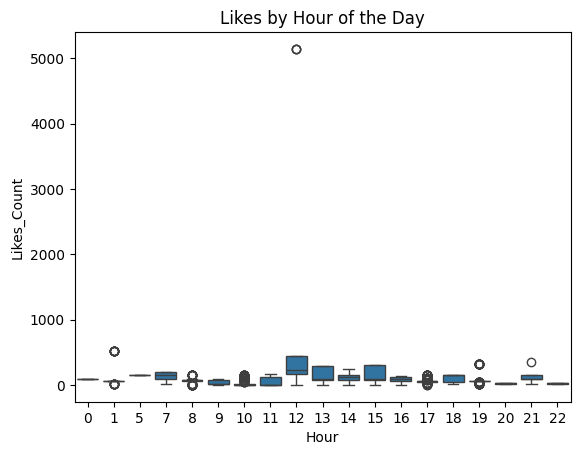

In [21]:
# Plot likes over time
data.groupby(data['Tweet_DateTime'].dt.date)['Likes_Count'].sum().plot()
plt.title("Total Likes Over Time")
plt.xlabel("Date")
plt.ylabel("Total Likes")
plt.show()

# Hourly trends
data['Hour'] = data['Tweet_DateTime'].dt.hour
sns.boxplot(x='Hour', y='Likes_Count', data=data)
plt.title("Likes by Hour of the Day")
plt.show()


In [ ]:
# Model

In [22]:
# Split data
X = df['Reply_Text']
y = df['Company_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction
# TF-IDF for SVM and Random Forest
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()


# Model Training and Evaluation

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       282
           1       0.97      0.96      0.97       150
           2       0.97      0.99      0.98       206
           3       0.98      0.99      0.99       290

    accuracy                           0.98       928
   macro avg       0.98      0.98      0.98       928
weighted avg       0.98      0.98      0.98       928



In [23]:
# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       282
           1       0.99      0.93      0.96       150
           2       0.97      0.98      0.98       206
           3       0.99      0.99      0.99       290

    accuracy                           0.98       928
   macro avg       0.98      0.98      0.98       928
weighted avg       0.98      0.98      0.98       928



In [25]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_length=128

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=2000, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(len(df['Reply_Text'].unique()), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.1)

y_pred_lstm = np.argmax(lstm_model.predict(X_test_padded), axis=1)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))


Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2142 - loss: 5.0144 - val_accuracy: 0.3450 - val_loss: 1.3172
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5747 - loss: 1.2089 - val_accuracy: 0.9380 - val_loss: 0.5142
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9420 - loss: 0.3665 - val_accuracy: 0.9650 - val_loss: 0.1528
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9716 - loss: 0.1247 - val_accuracy: 0.9596 - val_loss: 0.1220
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9712 - loss: 0.0924 - val_accuracy: 0.9730 - val_loss: 0.1039
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       282
           1       0.98      0.88      0.93       150
           2       0.92      0.96      0.94       206
           3       0.96      0.97      0.97       290

    accuracy         

In [27]:
# BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_length = 128

def bert_encode(texts, tokenizer, max_len):
    """Encode texts using the BERT tokenizer."""
    inputs = tokenizer.batch_encode_plus(
        texts,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors="tf"
    )
    return {
        'input_ids': inputs['input_ids'],
        'attention_mask': inputs['attention_mask'],
        'token_type_ids': inputs['token_type_ids']
    }

# Tokenize the training and testing data
X_train_encoded = bert_encode(X_train.tolist(), bert_tokenizer, max_length)
X_test_encoded = bert_encode(X_test.tolist(), bert_tokenizer, max_length)

# Convert labels to tensors
y_train_tensor = tf.convert_to_tensor(y_train.values)
y_test_tensor = tf.convert_to_tensor(y_test.values)

# Load the BERT model
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=len(y.unique())
)
# Define training parameters
batch_size = 16
epochs = 3
total_train_steps = (len(X_train) // batch_size) * epochs
warmup_steps = int(0.1 * total_train_steps)

# Create optimizer
optimizer, lr_schedule = create_optimizer(
    init_lr=5e-5,
    num_train_steps=total_train_steps,
    num_warmup_steps=warmup_steps,
    weight_decay_rate=0.01
)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ["accuracy"]
# Compile the model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model
history = bert_model.fit(
    {
        "input_ids": X_train_encoded["input_ids"],
        "attention_mask": X_train_encoded["attention_mask"],
        "token_type_ids": X_train_encoded["token_type_ids"],
    },
    y_train_tensor,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model
results = bert_model.evaluate(
    {
        "input_ids": X_test_encoded["input_ids"],
        "attention_mask": X_test_encoded["attention_mask"],
        "token_type_ids": X_test_encoded["token_type_ids"],
    },
    y_test_tensor
)

# Generate predictions
y_pred_logits = bert_model.predict(
    {
        "input_ids": X_test_encoded["input_ids"],
        "attention_mask": X_test_encoded["attention_mask"],
        "token_type_ids": X_test_encoded["token_type_ids"],
    }
)["logits"]

# Convert logits to predicted labels
y_pred = np.argmax(y_pred_logits, axis=1)

# Classification report
print("BERT Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
209/209 [==============================] - 111s 432ms/step - loss: 0.3917 - accuracy: 0.8556 - val_loss: 0.0575 - val_accuracy: 0.9892
Epoch 2/3
209/209 [==============================] - 89s 423ms/step - loss: 0.0542 - accuracy: 0.9838 - val_loss: 0.0718 - val_accuracy: 0.9730
Epoch 3/3
29/29 [==============================] - 8s 245ms/step
BERT Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       282
           1       0.99      0.97      0.98       150
           2       0.98      0.99      0.99       206
           3       1.00      0.99      0.99       290

    accuracy                           0.99       928
   macro avg       0.99      0.99      0.99       928
weighted avg       0.99      0.99      0.99       928



In [31]:
# Initialize a results DataFrame
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Random Forest Evaluation
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_metrics = pd.DataFrame([{
    "Model": "Random Forest",
    "Accuracy": rf_accuracy,
    "Precision": rf_report["weighted avg"]["precision"],
    "Recall": rf_report["weighted avg"]["recall"],
    "F1-Score": rf_report["weighted avg"]["f1-score"]
}])
results_df = pd.concat([results_df, rf_metrics], ignore_index=True)

# SVM Evaluation
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_metrics = pd.DataFrame([{
    "Model": "SVM",
    "Accuracy": svm_accuracy,
    "Precision": svm_report["weighted avg"]["precision"],
    "Recall": svm_report["weighted avg"]["recall"],
    "F1-Score": svm_report["weighted avg"]["f1-score"]
}])
results_df = pd.concat([results_df, svm_metrics], ignore_index=True)

# LSTM Evaluation
lstm_report = classification_report(y_test, y_pred_lstm, output_dict=True)
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_metrics = pd.DataFrame([{
    "Model": "LSTM",
    "Accuracy": lstm_accuracy,
    "Precision": lstm_report["weighted avg"]["precision"],
    "Recall": lstm_report["weighted avg"]["recall"],
    "F1-Score": lstm_report["weighted avg"]["f1-score"]
}])
results_df = pd.concat([results_df, lstm_metrics], ignore_index=True)

# BERT Evaluation
bert_report = classification_report(y_test, y_pred, output_dict=True)
bert_accuracy = accuracy_score(y_test, y_pred)
bert_metrics = pd.DataFrame([{
    "Model": "BERT",
    "Accuracy": bert_accuracy,
    "Precision": bert_report["weighted avg"]["precision"],
    "Recall": bert_report["weighted avg"]["recall"],
    "F1-Score": bert_report["weighted avg"]["f1-score"]
}])
results_df = pd.concat([results_df, bert_metrics], ignore_index=True)

# Display the results DataFrame
print("Model Evaluation Summary:")
print(results_df)

Model Evaluation Summary:
           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.981681   0.981729  0.981681  0.981675
1            SVM  0.981681   0.981817  0.981681  0.981568
2           LSTM  0.956897   0.957541  0.956897  0.956689
3           BERT  0.988147   0.988170  0.988147  0.988144


<ipython-input-31-f968f2a9941b>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, rf_metrics], ignore_index=True)
